In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

%matplotlib inline

(480, 480)


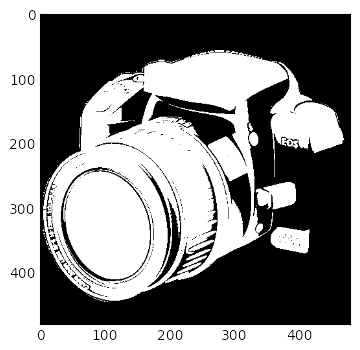

In [248]:
filename = '/Users/munsellb/camera.png'
I = cv2.imread( filename )
G = I[:,:,1] #cv2.cvtColor( I, cv2.COLOR_BGR2GRAY )
X = np.zeros( G.shape )
X = cv2.GaussianBlur(G, (5,5), 0.5 )
#B = cv2.Laplacian( X, cv2.CV_64F )
#B = cv2.Sobel( X, cv2.CV_64F, 1, 1, ksize=3 )

[ret, B] = cv2.threshold( X, 25, 255, cv2.THRESH_BINARY )

print B.shape

plt.imshow( B, cmap='gray')

137.778350515


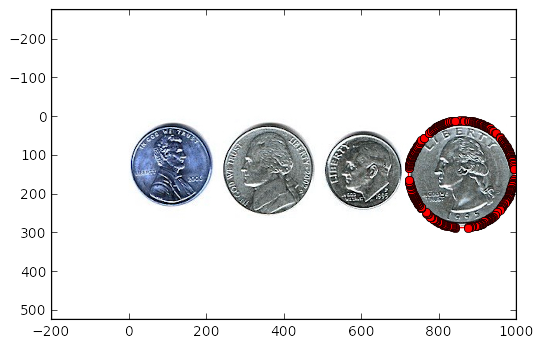

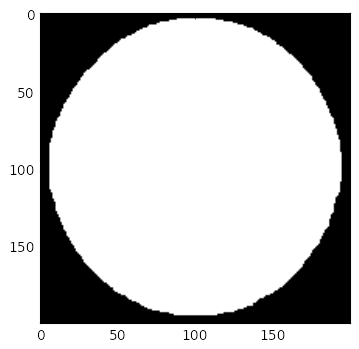

In [36]:
filename = '/Users/munsellb/coins2.jpeg'
I = cv2.imread( filename )

plt.figure()
plt.imshow( I )
G = cv2.cvtColor( I, cv2.COLOR_BGR2GRAY )

S = np.zeros( (200,200) )
B = cv2.GaussianBlur( G,(25,25),2.5)
[ret, thresh] = cv2.threshold( B, 240, 255, cv2.THRESH_BINARY )

#plt.imshow( thresh , cmap='gray')

contours,h = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE )

L=contours[4][:,0]

#print L

Xc = L[:,1] - np.mean( L[:,1] )
Yc = L[:,0] - np.mean( L[:,0] )
      
x_max = np.absolute( np.amax( Xc ) )
y_max = np.absolute( np.amax( Yc ) )
      
d_max = x_max;
      
if y_max > d_max:
     d_max = y_max
        
print d_max

X = Xc*(d_max/200) + 100
Y = Yc*(d_max/200) + 100
      
#X = (Xc/d_max)*(200/5) + 100   
#Y = (Yc/d_max)*(200/5) + 100 
     
# print L[:,0]
plt.plot( L[:,0], L[:,1], 'ro-')
plt.axis( 'equal' )
plt.show();

O = np.matrix([Y,X]).transpose(1,0)
cv2.drawContours(S, [O.astype(int)], -1, 255, -1 )

plt.figure()
plt.imshow( S, cmap='gray')


### Gradient assignment

The Laplacian $\nabla f = \frac{\partial f}{\partial x} + \frac{\partial f}{\partial y }$ performs a partial first-order derivative in both the x-direction $\frac{\partial f}{\partial x}$ and the y-direction $\frac{\partial f}{\partial y}$ where $f(x,y)$ is a function that represents the image we are operating on. In discrete notation the partial first-order derivates are found using:

$$G_x = \frac{\partial f}{\partial x} = f(x+1,y) - f(x-1,y)$$

and

$$G_y = \frac{\partial f}{\partial y } = f(x,y+1) - f(x,y-1)$$

We can then find the magnitude of the gradient

$$| \nabla f(x,y) | = \sqrt{ G_x^2 + G_y^2 }$$

and the angle of the gradient

$$ \Theta = tan^{-1} \frac{G_y}{G_x} $$.

The $3 \times 1$ kernel matrix for $G_x$ is

<table width="5%">
    <tr>
      <td><center>-1</center></td>
    </tr>
    <tr>
      <td><center>0</center></td>
    </tr>
    <tr>
      <td><center>1</center></td>
    </tr>
</table>

and the $1 \times 3$ kernel matrix for $G_y$ is

<table width="15%">
    <tr>
      <td><center>-1</center></td>
      <td><center>0</center></td>
      <td><center>1</center></td>
    </tr>
</table>

**Q1**. [*All Students*] Using Python and the OpenCV library, write a small program that applies the gradient kernel matrices (defined above) to the "ghand.png" image. Your program shall create a new *gradient magnitude* image that only defines the contour of the hand. All other edge information should not be included. Note: you may use thresholding and smoothing operations provided by the OpenCV library (i.e. you don't need to write your own program to perform this operation) to help solve this question. 

**Q2**. [*All Students*] Using Python and the OpenCV library, write a small program that applies the gradient kernel matrices (defined above) to the "ghand.png" image. Your program shall create a new *gradient angle* image that only defines the contour of the hand. All other edge information should not be included. Note: you may use the gradient magnitude image found in Q1 above to help solve this question. 

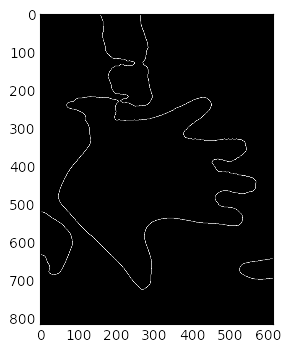

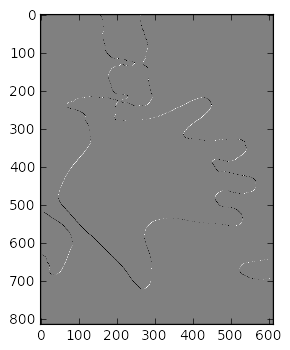

In [3]:
filename = '/Users/munsellb/ghand.png'
I = cv2.imread( filename )

G = cv2.cvtColor( I, cv2.COLOR_BGR2GRAY )
G = cv2.equalizeHist( G )

# create an empty magnitude (M) and
# angle (A) image that has the same
# resolution as image G
M = np.zeros( G.shape )
A = np.zeros( G.shape )

# two level threshold (60 to 150)
# anything >= 60 set to 255, else set to 0
# anythong <= 150 set to 255, else set to 0
[ret, thresh1] = cv2.threshold( G, 60, 255, cv2.THRESH_BINARY )
[ret, thresh2] = cv2.threshold( G, 150, 255, cv2.THRESH_BINARY_INV )
thresh = np.multiply( thresh1, thresh2 )

# smooth image, i.e. fill in black pix values
# that are surrounded by a neighborhood of 
# white pix values
thresh = cv2.GaussianBlur( thresh, (45,45), 35.0 )

m,n = thresh.shape

for i in xrange(0, m-1):
        
    # few ternary operators to check index 
    # out-of-bounds conditions, e.g. I[-1,:]
    dy = i if i+1 > m-1 else i+1
    ddy = 0 if i-1 < 0 else i-1
            
    for j in xrange(0, n-1):
        
        # few ternary operators to check index 
        # out-of-bounds conditions, e.g. I[:,-1]
        dx = j if j+1 > n-1 else j+1
        ddx = 0 if j-1 < 0 else j-1
        
        # compute the gradients in both dimensions
        # using 1x3 or 3x1 kernel matrix values
        Gy = np.float_( thresh[dy,j] ) - np.float_( thresh[ddy,j] )
        Gx = np.float_( thresh[i,dx] ) - np.float_( thresh[i,ddx] )
            
        # compute gradient magnitude
        M[i,j] = np.sqrt( np.power(Gx,2) + np.power(Gy,2) )
        # compute gradient angle
        A[i,j] = 0 if Gx == 0 else np.arctan( Gy / Gx )
  

# display gradient magnitude image
plt.figure()
plt.imshow( M, cmap='gray')

# display gradient angle image
plt.figure()
plt.imshow( A, cmap='gray')

### Laplacian assignment

The Laplacian $\nabla^2 f = \frac{\partial^2f}{\partial x^2} + \frac{\partial^2f}{\partial y^2}$ performs a partial second-order derivative in both the x-direction $\frac{\partial^2f}{\partial x^2}$ and the y-direction $\frac{\partial^2f}{\partial y^2}$ where $f(x,y)$ is a function that represents the image we are operating on. In discrete notation the partial second-order derivates are found using:

$$\frac{\partial^2f}{\partial x^2} = f(x+1,y) + f(x-1,y) - 2f(x,y)$$
and
$$\frac{\partial^2f}{\partial y^2} = f(x,y+1) + f(x,y-1) - 2f(x,y)$$

In general, we combine these two second order derivatives

$$\nabla^2 f(x,y) = f(x+1,y) + f(x-1,y) + f(x,y+1) + f(x,y-1) - 4f(x,y)$$

into one $3 \times 3$ kernel matrix

<table width="25%">
    <tr>
      <td><center>0</center></td>
      <td><center>1</center></td>
      <td><center>0</center></td>
    </tr>
    <tr>
      <td><center>1</center></td>
      <td><center>-4</center></td>
      <td><center>1</center></td>
    </tr>
    <tr>
      <td><center>0</center></td>
      <td><center>1</center></td>
      <td><center>0</center></td>
    </tr>
</table>

**Q1**. [*MUSC Graduate Students*] Why do we combine the two partial second-order derivatives into one $3 \times 3$ Laplacian kernel matrix? That is, why don't we perform a x-direction ( $3 \times 3$ kernel matrix) and y-direction ($3 \times 3$ kernel matrix) computation, i.e. like gradient above, to find the magnitude and direction of the edge?

**Q2**. [*All Students*] Using Python and the OpenCV library, write a small program that applies the Laplacian kernel matrix (defined above) to the "hand.png" image. Your program shall create a new edge image that only defines the contour of the hand. All other edge information should not be included. Note: you may use thresholding and smoothing operations provided by the OpenCV library (i.e. you don't need to write your own program to perform this operation) to help solve this question. 


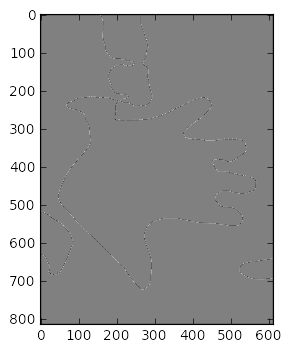

In [4]:
filename = '/Users/munsellb/ghand.png'
I = cv2.imread( filename )

G = cv2.cvtColor( I, cv2.COLOR_BGR2GRAY )
G = cv2.equalizeHist( G )

# create an empty edge (E) image
# that has the same resolution as G
E = np.zeros( G.shape )

# two level threshold (60 to 150)
# anything >= 60 set to 255, else set to 0
# anythong <= 150 set to 255, else set to 0
[ret, thresh1] = cv2.threshold( G, 60, 255, cv2.THRESH_BINARY )
[ret, thresh2] = cv2.threshold( G, 150, 255, cv2.THRESH_BINARY_INV )
thresh = np.multiply( thresh1, thresh2 )

# smooth image, i.e. fill in black pix values
# that are surrounded by a neighborhood of 
# white pix values
thresh = cv2.GaussianBlur( thresh, (45,45), 35.0 )

m,n = thresh.shape

for i in xrange(0, m-1):
        
    # few ternary operators to check index 
    # out-of-bounds conditions, e.g. I[-1,:]
    dy = i if i+1 > m-1 else i+1
    ddy = 0 if i-1 < 0 else i-1
            
    for j in xrange(0, n-1):
        
        # few ternary operators to check index 
        # out-of-bounds conditions, e.g. I[:,-1]
        dx = j if j+1 > n-1 else j+1
        ddx = 0 if j-1 < 0 else j-1
            
        # compute 2nd order derivative using
        # 3x3 kernel matrix values
        E[i,j] = thresh[i,dx] + thresh[i,ddx] + thresh[dy,j] + thresh[ddy,j] - (4*thresh[i,j])

# opencv Laplacian function, should give the
# same results (uncomment to compare)
#S = cv2.Laplacian( thresh, cv2.CV_64F )   

plt.imshow( E, cmap='gray')